In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv("lemonade.csv")

In [3]:
df.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.589041
std,18.085892,0.273890,13.786445,0.0,29.979680
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


In [33]:
df.head()
df.set_index("Date", inplace=True)

# Step 0. Chart and smell test the data
- Chart out the fields of interest
- Ignore anything ignoreable (like the price column since it stays the same)
- Identify any outliers that are impossible
- Identify any outliers that require deeper analysis

### Sanity Check the Temperature data

Text(0.5, 1.0, 'Tempurature over time')

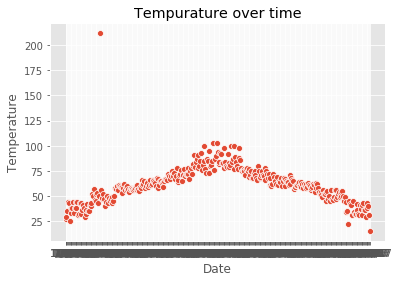

In [5]:
# Let's plot out Temperature.
sns.scatterplot(x=df.Date, y=df.Temperature).set_title('Tempurature over time')

### Temperature findings:
- Almost all the temperatures look reasonable
- One observation is definitely abnormal.
- I don't need an algorithm to tell me that 212 degrees  

## Next, we'll plot and sanity check the rainfall column

Text(0.5, 1.0, 'Rainfall over time')

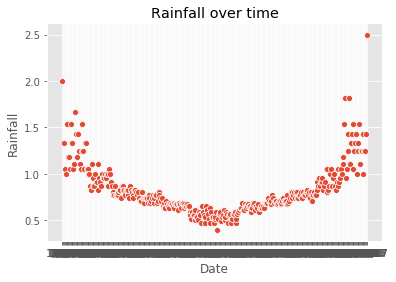

In [6]:
# Let's sanity check rainfall.
sns.scatterplot(x=df.Date, y=df.Rainfall).set_title('Rainfall over time')

### Rainfall findings
- There are some outliers, but the pattern is clear and there aren't "impossible" observations
- The data makese sense and the trend is clear

## Let's plot and sanity check Flyers

Text(0.5, 1.0, 'Flyers over time')

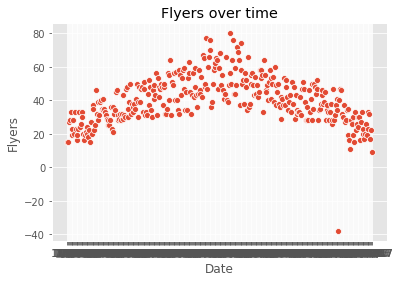

In [7]:
# Let's sanity check the flyers column.
sns.scatterplot(x=df.Date, y=df.Flyers).set_title('Flyers over time')

## Flyers Findings
- Negative observation of flyers is probably not possible.
- This outlier looks like it should be ignored and removed since it doesn't pass the smell test

## Plot and Sanity test Sales

Text(0.5, 1.0, 'Sales over time')

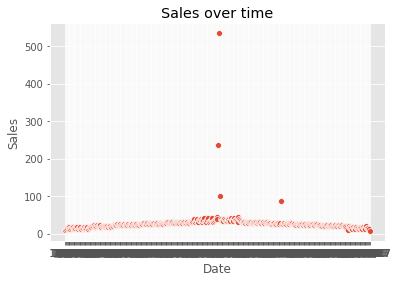

In [8]:
# Let's sanity check the sales column.
sns.scatterplot(x=df.Date, y=df.Sales).set_title('Sales over time')

### Sales Findings:
- Sales data passes a quick sanity check. There aren't impossible values.
- Often, sales activity has spikes, so these spikes may make sense to keep in the dataset
- How likely are the extreme values and why might they exist is a deeper question.

In [9]:
# Drop the price cyolumn because it's static
df.drop(columns=["Price"], inplace=True)

### Exercises

In [10]:
def get_lower_and_upper_bounds(series, multiplier = 1.5):
    """
    Takes in a series
    Identifies the upper/lower bounds using IQR range rule
    Returns the upper and lower bounds as a tuple
    """
    q3 = series.quantile(.75)
    q1 = series.quantile(.25)
    iqr = q3 - q1
    lower_bound = q1 - multiplier * iqr
    upper_bound = q3 + multiplier * iqr
    return lower_bound, upper_bound

### IQR Range rule for Temperature

In [11]:
# Determine temperature boundaries using IQR range rule
lower_bound, upper_bound = get_lower_and_upper_bounds(df.Temperature)

In [12]:
# Low outliers on temperature
low_outliers = df.Temperature[df.Temperature < lower_bound]
low_outliers

364    15.1
Name: Temperature, dtype: float64

In [13]:
# Upper outliers on temperature
higher_outliers = df.Temperature[df.Temperature > upper_bound]
higher_outliers

41    212.0
Name: Temperature, dtype: float64

In [14]:
# Setting the multiplier to 3 to find more extreme anomalies
lower_bound, upper_bound = get_lower_and_upper_bounds(df.Temperature, multiplier=3)

In [15]:
# Low outliers on temperature
low_outliers = df.Temperature[df.Temperature < lower_bound]
low_outliers

Series([], Name: Temperature, dtype: float64)

### Since the temperature of 15.1 is on 1.5 but not 3, it's not a very extreme outlier

In [16]:
# Upper outliers on temperature
higher_outliers = df.Temperature[df.Temperature > upper_bound]
higher_outliers

41    212.0
Name: Temperature, dtype: float64

### A temperature of 212 is absurd. This is definitely a value to remove or replace with a mean, median, or imputation 

## Now let's do IQR Range rule on Rainfall

In [17]:
# Determine temperature boundaries using IQR range rule
lower_bound, upper_bound = get_lower_and_upper_bounds(df.Rainfall)

In [18]:
# Low outliers on rainfall
low_outliers = df.Rainfall[df.Rainfall < lower_bound]
low_outliers

Series([], Name: Rainfall, dtype: float64)

In [19]:
# Low outliers on rainfall
high_outliers = df.Rainfall[df.Rainfall > upper_bound]
high_outliers

0      2.00
1      1.33
2      1.33
5      1.54
6      1.54
10     1.54
11     1.33
12     1.33
15     1.67
16     1.43
19     1.43
23     1.54
27     1.33
28     1.33
337    1.54
338    1.82
342    1.43
343    1.82
345    1.33
346    1.43
347    1.54
350    1.33
351    1.43
354    1.33
355    1.54
359    1.43
363    1.43
364    2.50
Name: Rainfall, dtype: float64

In [20]:
print(f'There are to be {len(high_outliers)} mild outliers in the upper range of values')

There are to be 28 mild outliers in the upper range of values


In [21]:
# Determine temperature boundaries using IQR range rule
lower_bound, upper_bound = get_lower_and_upper_bounds(df.Rainfall, multiplier=3)

In [22]:
# Low outliers on rainfall
high_outliers = df.Rainfall[df.Rainfall > upper_bound]
high_outliers

0      2.00
338    1.82
343    1.82
364    2.50
Name: Rainfall, dtype: float64

By setting the IQR range rule multiplier to 3, we're down to 4 more extreme outliers

In [34]:
lower_bound, upper_bound = get_lower_and_upper_bounds(df.Sales)

In [35]:
df.Sales[df.Sales < lower_bound]

Series([], Name: Sales, dtype: int64)

In [36]:
df.Sales[df.Sales > upper_bound]

Date
7/3/17     235
7/4/17     534
7/5/17      99
9/16/17     87
Name: Sales, dtype: int64

In [37]:
lower_bound, upper_bound = get_lower_and_upper_bounds(df.Sales, 3)

In [38]:
df.Sales[df.Sales > upper_bound]

Date
7/3/17     235
7/4/17     534
7/5/17      99
9/16/17     87
Name: Sales, dtype: int64

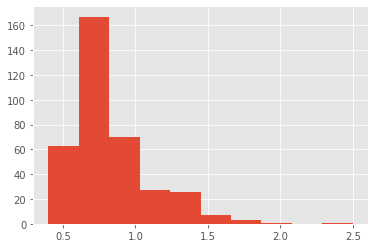

In [39]:
df.Rainfall.hist()

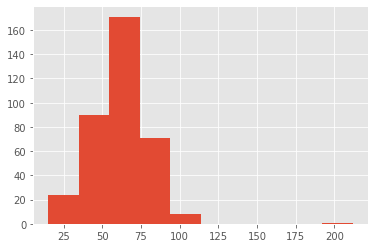

In [40]:
df.Temperature.hist()

In [42]:
df.Temperature[df.Temperature == 212]

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
df = pd.read_csv("lemonade.csv")

In [51]:
df.loc[df.Temperature == 212, 'Temperature'] = 50

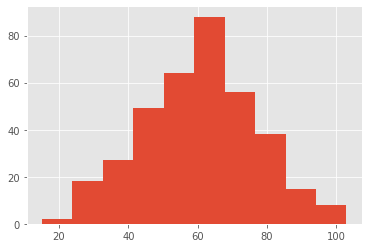

In [52]:
df.Temperature.hist()

In [53]:
sigma = df.Temperature.std()

In [56]:
mean_minus_two_sigma = df.Temperature.mean() - 2*sigma
mean_plus_two_sigma = df.Temperature.mean() + 2*sigma

In [57]:
df[df.Temperature < mean_minus_two_sigma]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
5,1/6/17,Friday,25.3,1.54,23,0.5,11
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


In [58]:
df[df.Temperature > mean_plus_two_sigma]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
166,6/16/17,Friday,99.3,0.47,77,0.5,41
171,6/21/17,Wednesday,94.3,0.47,76,0.5,41
176,6/26/17,Monday,102.6,0.47,60,0.5,42
181,7/1/17,Saturday,102.9,0.47,59,0.5,43
182,7/2/17,Sunday,93.4,0.51,68,0.5,38
190,7/10/17,Monday,98.0,0.49,66,0.5,40
198,7/18/17,Tuesday,99.3,0.47,76,0.5,41
202,7/22/17,Saturday,99.6,0.47,49,0.5,42
207,7/27/17,Thursday,97.9,0.47,74,0.5,43


In [59]:
len(df[df.Temperature > mean_plus_two_sigma] )

9

In [61]:
13 / 365

0.03561643835616438